# Cross-correlation between song and spike density functions (firing rates)


<img src="img/song_fr_cross_corr_example.png" width=500 height=700 />

- Read results values from song_fr_cross_corrsong_fr_cross_corr table
- Compare peak latency & max value of the mean cross-correlation between binarized song and firing rates

In [2]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from pyfinch.utils import save
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')

## Load Data

In [4]:
from pyfinch.database.load import ProjectLoader
db = ProjectLoader().load_db()
df = db.to_dataframe(f"""SELECT song_fr_cross_corr.*, cluster.birdID, cluster.taskName, cluster.block10days
                FROM song_fr_cross_corr INNER JOIN cluster ON cluster.id = song_fr_cross_corr.clusterID""")
df.set_index('clusterID')

,nbMotifUndir,crossCorrMax,peakLatency,birdID,taskName,block10days
clusterID,,,,,,
6,27,0.451,83.0,b70r38,Postdeafening,1
9,21,0.429,-18.0,b70r38,Postdeafening,2
10,43,0.511,-10.0,b70r38,Postdeafening,2
11,27,0.377,-38.0,b70r38,Postdeafening,2
12,70,0.488,-31.0,b70r38,Postdeafening,2
...,...,...,...,...,...,...
124,34,0.477,-7.0,k27o36,Postdeafening,3
126,13,0.423,30.0,k27o36,Postdeafening,4
129,20,0.559,-50.0,o25w75,Postdeafening,4


In [4]:
df.columns

Index(['clusterID', 'nbMotifUndir', 'crossCorrMax', 'peakLatency', 'birdID',
       'taskName', 'block10days'],
      dtype='object')

# Compare peak latency vs. max cross-correlation 

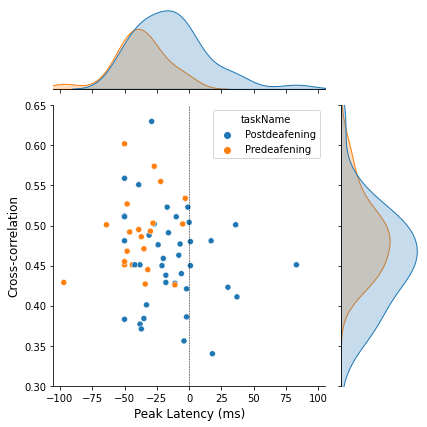

In [5]:
# V1
h = sns.jointplot(x="peakLatency", y="crossCorrMax", data=df,
                  hue='taskName',
#                   s=30, 
                  legend=True, 
                  height=6, ratio=3, 
                  xlim=(-105, 105), ylim=(0.3, 0.65)
                  )

h.set_axis_labels('Peak Latency (ms)', 'Cross-correlation', fontsize=12)
h.ax_joint.axvline(x=0, linestyle = '--', color = 'k', linewidth = 0.5)
plt.show()

In [6]:
df.query('taskName == "Predeafening"')['crossCorrMax']

14    0.445
15    0.574
16    0.451
17    0.527
18    0.486
19    0.451
20    0.455
33    0.429
34    0.471
35    0.493
36    0.534
41    0.602
42    0.426
43    0.501
44    0.492
45    0.502
46    0.468
47    0.427
49    0.555
50    0.503
51    0.495
Name: crossCorrMax, dtype: float64

In [7]:
# Check for normality assumptions
from scipy.stats import shapiro
_, pval = shapiro(df.query('taskName == "Predeafening"')['crossCorrMax'])
print(pval)
_, pval = shapiro(df.query('taskName == "Postdeafening"')['crossCorrMax'])
print(pval)
_, pval = shapiro(df.query('taskName == "Predeafening"')['peakLatency'])
print(pval)
_, pval = shapiro(df.query('taskName == "Postdeafening"')['peakLatency'])
print(pval)

0.25342535972595215
0.7507643103599548
0.12669862806797028
0.004466407932341099


H:\Box\Data\Deafening Project\Analysis\SongFR_CrossCorr\song_fr_crosscorr.pdf


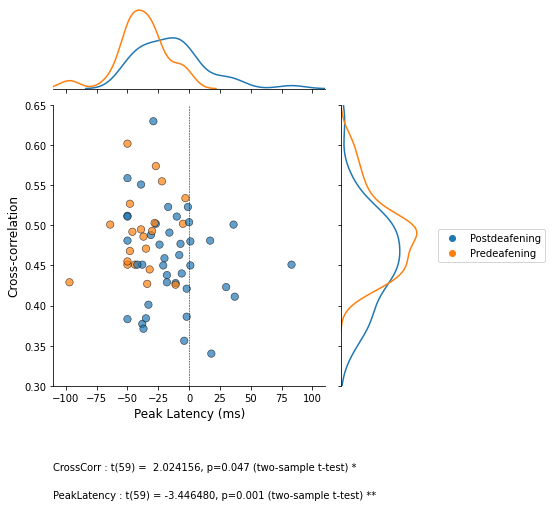

In [60]:
# V2
# Parameters
save_fig = True
fig_ext = '.pdf'
save_path = save.make_dir(ProjectLoader().path / 'Analysis', 'SongFR_CrossCorr', add_date=False)
fig_size = 6
mark_birds = False  # mark birds with a different marker style
fig_name = 'song_fr_crosscorr'
kernel_bw = 0.4
marker_style = 'birdID' if mark_birds else None
hue_order = ['Postdeafening', 'Predeafening']

def draw_paired_scatter(df, save_fig=save_fig):
    g = sns.JointGrid(x="peakLatency", y="crossCorrMax",  data=df, xlim=(-110, 110), ylim=(0.3, 0.65), height=fig_size, ratio=3)
    g.plot_joint(sns.scatterplot, 
                 hue='taskName', 
                 hue_order=hue_order,
                 style=marker_style, 
                 s=55, 
                 alpha=0.7,
                 edgecolor="black",
                 data=df)
    
    # plot legend on the right
    if marker_style:
        handles, labels = g.ax_joint.get_legend_handles_labels()
        order = np.array(range(0, len(labels)))  #specify order of items in legend
        np.put(order, [0, 1, 2], [0, 2, 1])
        g.ax_joint.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
                  loc='center left', bbox_to_anchor=(1.4, 0.5)
                  ) 
    else: 
        g.ax_joint.legend(loc='center left', bbox_to_anchor=(1.4, 0.5)) 

    # plot density function
    sns.kdeplot(df.loc[df['taskName']=='Postdeafening', 'peakLatency'], ax=g.ax_marg_x, bw=kernel_bw)
    sns.kdeplot(df.loc[df['taskName']=='Predeafening', 'peakLatency'], ax=g.ax_marg_x, bw=kernel_bw)
    sns.kdeplot(df.loc[df['taskName']=='Postdeafening', 'crossCorrMax'], ax=g.ax_marg_y, vertical=True, bw=kernel_bw)
    sns.kdeplot(df.loc[df['taskName']=='Predeafening', 'crossCorrMax'], ax=g.ax_marg_y, vertical=True, bw=kernel_bw)

    g.ax_joint.axvline(x=0, linestyle = '--', color = 'k', linewidth = 0.5)
    g.set_axis_labels('Peak Latency (ms)', 'Cross-correlation', fontsize=12)

    # run stats
    from pyfinch.utils.stats import two_sample_ttest, two_sample_ks_test
    pre = df.query('taskName == "Predeafening"')['crossCorrMax']
    post = df.query('taskName == "Postdeafening"')['crossCorrMax']
    _, _, msg, sig = two_sample_ttest(pre, post)
    g.ax_joint.text(0, -0.3, 'CrossCorr : ' + msg + " (two-sample t-test) " + sig, transform=g.ax_joint.transAxes)
    # pval, msg, sig = two_sample_ks_test(pre, post)
    # g.ax_joint.text(0, -0.3, 'CrossCorr : ' + msg + " (ks-test) " + sig, transform=g.ax_joint.transAxes)

    pre = df.query('taskName == "Predeafening"')['peakLatency']
    post = df.query('taskName == "Postdeafening"')['peakLatency']
    _, _, msg, sig = two_sample_ttest(pre, post)
    g.ax_joint.text(0, -0.4, 'PeakLatency : ' + msg + " (two-sample t-test) " + sig, transform=g.ax_joint.transAxes)
    # pval, msg, sig = two_sample_ks_test(pre, post)
    # g.ax_joint.text(0, -0.4, 'PeakLatency : ' + msg + " (ks-test) " + sig, transform=g.ax_joint.transAxes)

    if save_fig:
        g.savefig(save_path / (fig_name + fig_ext)) 
        print(save_path / (fig_name + fig_ext))
    else:
        plt.show()
        
        
draw_paired_scatter(df)

## Plot only for the birds that had both pre and post neurons

H:\Box\Data\Deafening Project\Analysis\SongFR_CrossCorr\song_fr_crosscorr.pdf


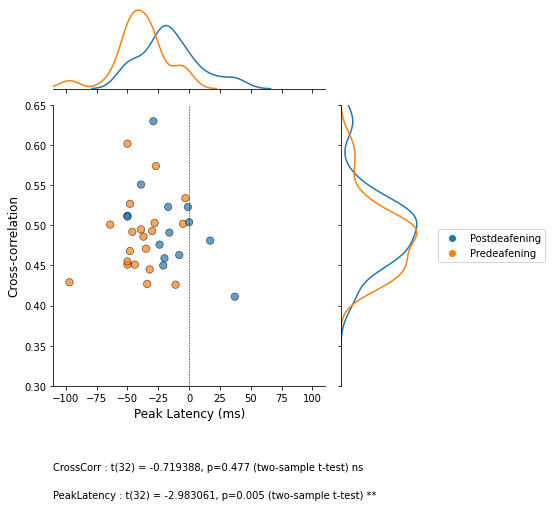

In [62]:
# Draw scatter only for neurons where the neurons were recorded from the same bird from both conditions
df_temp = df.groupby(['birdID'])['taskName'].agg('nunique').reset_index()
bird_list = df_temp[df_temp['taskName']== 2]['birdID'].tolist()
df_both_task = df[df['birdID'].isin(bird_list)]

draw_paired_scatter(df_both_task)

In [11]:
df.columns

Index(['clusterID', 'nbMotifUndir', 'crossCorrMax', 'peakLatency', 'birdID',
       'taskName', 'block10days'],
      dtype='object')

## Comparison across blocks and run post-hoc

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1  31.8952 0.1197  -4.9291 68.7195  False
     0      2  24.2202 0.0251    2.108 46.3325   True
     0      3  14.8095 0.6742 -17.4875 47.1066  False
     0      4  29.5952  0.249 -10.7761 69.9665  False
     1      2   -7.675    0.9  -44.054  28.704  False
     1      3 -17.0857  0.775 -60.4167 26.2453  False
     1      4     -2.3    0.9 -51.9419 47.3419  False
     2      3  -9.4107    0.9 -41.1991 22.3777  False
     2      4    5.375    0.9 -34.5906 45.3406  False
     3      4  14.7857 0.8936 -31.5974 61.1688  False
-----------------------------------------------------


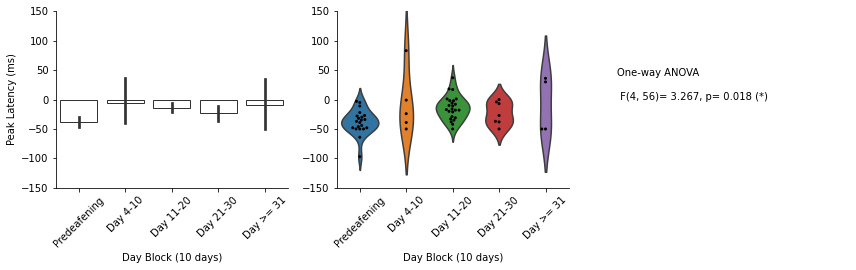

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.0125    0.9 -0.0648 0.0898  False
     0      2  -0.0434 0.0777 -0.0898  0.003  False
     0      3  -0.0366 0.5472 -0.1044 0.0312  False
     0      4   0.0011    0.9 -0.0836 0.0859  False
     1      2  -0.0559 0.2497 -0.1323 0.0204  False
     1      3  -0.0491 0.5463 -0.1401 0.0418  False
     1      4  -0.0114    0.9 -0.1156 0.0928  False
     2      3   0.0068    0.9 -0.0599 0.0736  False
     2      4   0.0445 0.5605 -0.0393 0.1284  False
     3      4   0.0377 0.7859 -0.0596 0.1351  False
---------------------------------------------------


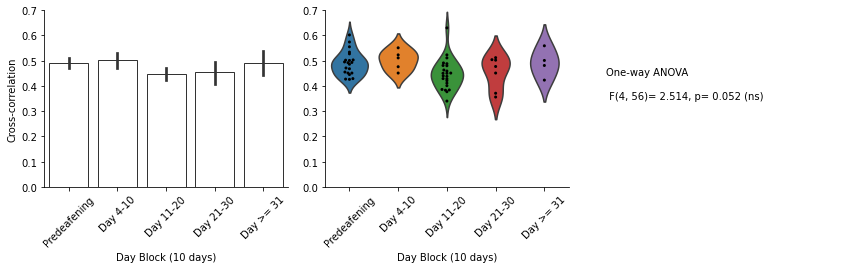

In [8]:
from deafening.plot import plot_per_day_block

# Peak Latency
plot_per_day_block(df, ind_var_name='block10days', dep_var_name='peakLatency',
                   # title=f'Syllable Entropy (Undir) per day block',
                   y_label='Peak Latency (ms)',
                   y_lim=[-150, 150],
                   post_hoc=True,
                   fig_name='SongFRCrossCorr_PeakLatency',
                   save_fig=False, fig_ext='.png'
                   )

# Peak Latency
plot_per_day_block(df, ind_var_name='block10days', dep_var_name='crossCorrMax',
                   # title=f'Syllable Entropy (Undir) per day block',
                   y_label='Cross-correlation',
                   y_lim=[0, 0.7],
                   post_hoc=True,
                   fig_name='SongFRCrossCorr',
                   save_fig=False, fig_ext='.png'
                   )